# How can the company improve collaboration?

## 📖 Background
You work in the analytics department of a multinational company, and the head of HR wants your help mapping out the company's employee network using message data. 

They plan to use the network map to understand interdepartmental dynamics better and explore how the company shares information. The ultimate goal of this project is to think of ways to improve collaboration throughout the company. 

## 💾 The data

The company has six months of information on inter-employee communication. For privacy reasons, only sender, receiver, and message length information are available [(source)](https://snap.stanford.edu/data/CollegeMsg.html). 

#### Messages has information on the sender, receiver, and time.
- "sender" - represents the employee id of the employee sending the message.
- "receiver" - represents the employee id of the employee receiving the message.
- "timestamp" - the date of the message.
- "message_length" - the length in words of the message.

#### Employees has information on each employee;
- "id" - represents the employee id of the employee.
- "department" - is the department within the company. 
- "location" - is the country where the employee lives.
- "age" - is the age of the employee.

_**Acknowledgments:** Pietro Panzarasa, Tore Opsahl, and Kathleen M. Carley. "Patterns and dynamics of users' behavior and interaction: Network analysis of an online community." Journal of the American Society for Information Science and Technology 60.5 (2009): 911-932._

## Executive Summary

Understanding how much employees from different departments connect or interact can help understand the level of collaboration between these departments and ultimately improve inter-departmental dynamics and collaboration. It would also help improve communication or information movement or sharing amongst the departments.

It was found in the analysis that:
- The most active department is the **Sales** department.
- The least active department is the **Engineering** department.
- The employee with the most connections has the **employee_id 598**
- The two most influential departments are the **Engineering** and **Admin** departments.
- The **marketing** department does not even collaborate with itself and the **IT** department.
- The **Engineering** department does not collaborate with the **Marketing** department.
- The three most influential employees have the employee ids **194, 32** and **249**
My recommendations would be for the HR team to:
- develop strategies that would ensure more team work and collaboration betweeen _Marketing, Engineering, and IT departments_. 
- set up tasks that would make the _Engineering_ department work more with other departments even though they are the most influential.
- organise inter-departmental hangouts to boost the relationships between different departments and also increase inter-departmental connections.
- possibly, organise rotation of employees through every department for some period of time to help them appreciate other departments more and improve collaboration.
- encourage special collaboration between the **Marketing** and **Engineering** departments.markdown

In [119]:
import pandas as pd

messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
messages

,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86
3,79,70,2021-06-02 05:49:07,26
4,79,109,2021-06-02 19:51:47,73
...,...,...,...,...
3507,469,1629,2021-11-24 05:04:57,75
3508,1487,1543,2021-11-26 00:39:43,25
3509,144,1713,2021-11-28 18:30:47,51
3510,1879,1520,2021-11-29 07:27:52,58


In [120]:
employees = pd.read_csv('data/employees.csv')
employees

,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54
3,9,Admin,UK,32
4,12,Operations,Brasil,51
...,...,...,...,...
659,1830,Admin,UK,42
660,1839,Admin,France,28
661,1879,Engineering,US,40
662,1881,Sales,Germany,57


In [121]:

# merge messages and employees dataframe to have all information in one dataframe
master = pd.merge(left=messages,right=employees,how='left',left_on='sender',right_on='id')
master = master.drop('id',axis=1)
master.rename(columns={'department':'sender_dept','location':'sender_location','age':'sender_age'},inplace=True)
master = pd.merge(left=master,right=employees,how='left',left_on='receiver',right_on='id')
master = master.drop('id',axis=1)
master.rename(columns={'department':'receiver_dept','location':'receiver_location','age':'receiver_age'},inplace=True)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 0 to 3511
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sender             3512 non-null   int64         
 1   receiver           3512 non-null   int64         
 2   timestamp          3512 non-null   datetime64[ns]
 3   message_length     3512 non-null   int64         
 4   sender_dept        3512 non-null   object        
 5   sender_location    3512 non-null   object        
 6   sender_age         3512 non-null   int64         
 7   receiver_dept      3512 non-null   object        
 8   receiver_location  3512 non-null   object        
 9   receiver_age       3512 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 301.8+ KB


#### Report
The _messages_ and _employees_ dataframe were merged together in order to get a single _master_ dataframe that has the employee information of both the _sender_ and _receiver_. For each message, the sender's department, age and location is present likewise for the receiver.

In [122]:
master

,sender,receiver,timestamp,message_length,sender_dept,sender_location,sender_age,receiver_dept,receiver_location,receiver_age
0,79,48,2021-06-02 05:41:34,88,Sales,France,33,IT,France,34
1,79,63,2021-06-02 05:42:15,72,Sales,France,33,Sales,France,38
2,79,58,2021-06-02 05:44:24,86,Sales,France,33,Sales,Germany,40
3,79,70,2021-06-02 05:49:07,26,Sales,France,33,Operations,France,47
4,79,109,2021-06-02 19:51:47,73,Sales,France,33,Marketing,Brasil,32
...,...,...,...,...,...,...,...,...,...,...
3507,469,1629,2021-11-24 05:04:57,75,Operations,France,54,Sales,Brasil,35
3508,1487,1543,2021-11-26 00:39:43,25,Sales,France,31,Operations,US,48
3509,144,1713,2021-11-28 18:30:47,51,Sales,US,50,IT,Germany,47
3510,1879,1520,2021-11-29 07:27:52,58,Engineering,US,40,Admin,US,45


### 1. Which departments are the most/least active?

In [123]:

# group the master dataframe by the sender departments and summarize by the sum of message length
sender_group = master[['sender_dept','message_length']].groupby('sender_dept').sum().reset_index().sort_values('message_length',ascending=False)
sender_group

,sender_dept,message_length
5,Sales,75391
4,Operations,48742
0,Admin,41837
2,IT,2361
3,Marketing,980
1,Engineering,848


#### Report
The _master_ dataframe was grouped based on the sender departments and summarized using the sum of the message length in words. The resulting table shows all departments and the total amount of words they sent. This includes messages sent to employees withing the same department.

The _Sales_ department is the most active department while the _Engineering_ department is the least active department, in terms of messages sent.

In [124]:
# group the master dataframe by the receiver departments and summarize by the sum of message length
receiver_group = master[['receiver_dept','message_length']].groupby('receiver_dept').sum().reset_index().sort_values('message_length',ascending=False)
receiver_group

,receiver_dept,message_length
5,Sales,62288
4,Operations,41002
0,Admin,38939
2,IT,11172
3,Marketing,9013
1,Engineering,7745


#### Report
The _master_ dataframe was grouped based on the receiver departments and summarized using the sum of the message lenght in words. The resulting table shows all departments and the total amount of words they received. This includes messages received from employees within the same department.

The _Sales_ department is the most active department while the Engineering department is the least active department, in terms of messages received.

In [125]:
# import important libraries for exploratory analysis and visualizations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

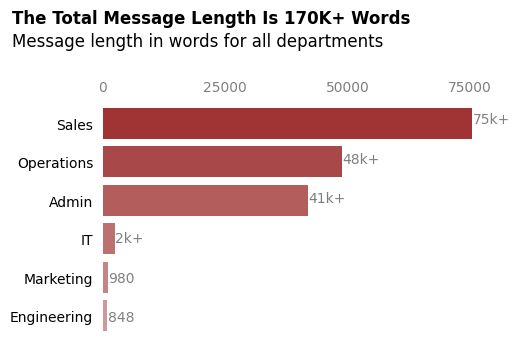

In [126]:
# create visualization to show the most/least active departments
plt.style.use('default')
fig, ax = plt.subplots(figsize=[5,3])
ax = sns.barplot(data=sender_group,y='sender_dept',x='message_length',color='#B22222')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([0,25000,50000,75000])
ax.xaxis.tick_top()
ax.tick_params(left=False,top=False)
ax.tick_params(axis='x',colors='grey')
for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
for bar, alpha in zip(ax.containers[0],np.linspace(1,0.5,6)):
    bar.set_alpha(alpha)
ax.text(-18500,-2.6,'The Total Message Length Is 170K+ Words',size=12,weight='bold');
ax.text(-18500,-2.0,'Message length in words for all departments',size=12);
y = 0
for x,text in zip(sender_group.message_length,['75k+','48k+','41k+','2k+','980','848']):
    ax.text(x+100,y,text,color='grey');
    y += 1.03

#### Report
A bar chart showing the the most active to the least active departments in terms of total length of messages sent in words. The _Sales, Operations, Admin, and IT_ departments have sent over _75,000, 48,000, 41,000 and 2,000_ words respectively while the _marketing and Engineering_ departments have sent below _1,000_ words.

- The most active department is the Sales Department.
- The least active department is the Engineering Department.

### 2. Which employee has the most connections?

In [127]:
# create a table showing employees who sent message and number of employees they contacted
employee = []
num_of_connections = []
for sender in master.sender.unique():
    employee.append(sender)
    value = master.receiver[master.sender == sender].nunique()
    num_of_connections.append(value)
connections = {'employee':employee,'num_of_connections':num_of_connections}
sender_connections = pd.DataFrame(connections).sort_values('num_of_connections',ascending=False).reset_index(drop=True)
sender_connections.head()

,employee,num_of_connections
0,598,77
1,144,75
2,128,71
3,605,68
4,586,64


#### Report
Each unique _employee_id_ that sent a message was iterated over in the _master_ dataframe in order to extract the number of unique other _employee_ids_ that sender contacted. The unique connections were counted to get the total number of unique employees contacted by the sender. This gives us an idea into the number of connections an employee has.

- The employee with _employee_id 598_ has the most connections at 77 employees.
- The employee is from the _Department of Operations_.

### 3. Identify the most influential departments and employees.

In [128]:
# create a table showing employees and the number of employees who contacted them.
employee = []
num_of_connections = []
for receiver in master.receiver.unique():
    employee.append(receiver)
    value = master.sender[master.receiver == receiver].nunique()
    num_of_connections.append(value)
connections = {'employee':employee,'num_of_connections':num_of_connections}
receiver_connections = pd.DataFrame(connections).sort_values('num_of_connections',ascending=False).reset_index(drop=True)
receiver_connections.head(10)

,employee,num_of_connections
0,194,13
1,32,11
2,249,9
3,42,8
4,1283,8
5,103,8
6,105,7
7,840,7
8,263,7
9,598,7


#### Report
Each unique _employee_id_ that received a message was iterated over in the master dataframe in order to extract the number of unique other _employee_ids_ the receiver got message from. This gives an insight into the level of influence the receiver has in the company.

The resulting table above shows the top 10 most contacted employees in the company.

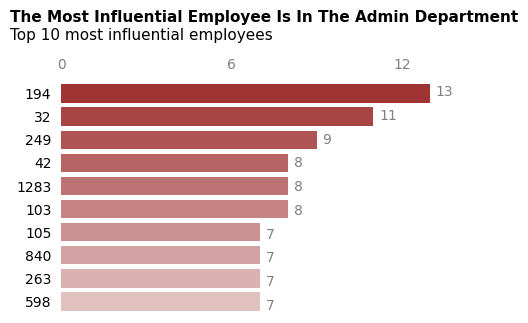

In [129]:
# top 10 most influential employees in a bar chart
receiver_connections.employee = receiver_connections.employee.astype('str')
data = receiver_connections[:10].set_index('employee')
fig, ax = plt.subplots(figsize=[5,3])
ax = sns.barplot(data=data,y=data.index,x='num_of_connections',color='#B22222')
for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
for bar, alpha in zip(ax.containers[0],np.linspace(1,0.3,10)):
    bar.set_alpha(alpha)
ax.xaxis.tick_top()
ax.tick_params(left=False,top=False)
ax.tick_params(axis='x',colors='grey')
ax.set_xticks([0,6,12]);
ax.set_xlabel('');
ax.set_ylabel('');
ax.text(-1.8,-2.3,'Top 10 most influential employees',size=11);
ax.text(-1.8,-3.1,'The Most Influential Employee Is In The Admin Department',size=11,weight='bold');
y = 0.1
for x in data.num_of_connections:
    ax.text(x+0.2,y,'{}'.format(x),color='grey');
    y += 1.03

#### Report
A bar chart showing the top 10 influential employees in the company based on the number of employees who contacted them. Thirteed different employees contacted the most influential employee in the company. It also makes sense that the most influential employee is in the _Admin Department_ becuase they are involved in the smooth running of the company as a whole and should command significant influence and respect in the company.
- The employee with _employee_id 194_ is the most influential.
- The most influential employee is from the _United States_.
- The most influential employee is in the _Admin_ department.

In [130]:
# create a table for departments and number of connections outside the departments and number of other departments connected to.
depts = []
conn_out_dept = []
num_other_depts = []
num_locations = []
for dept in master.receiver_dept.unique():
    df_dept = master[['sender_dept','sender','receiver_dept','sender_location']][master.receiver_dept == dept]
    df_dept = df_dept[df_dept.sender_dept != dept]
    conn_count = df_dept.sender.nunique()
    dept_count = df_dept.sender_dept.nunique()
    loc_count = df_dept.sender_location.nunique()
    depts.append(dept)
    conn_out_dept.append(conn_count)
    num_other_depts.append(dept_count)
    num_locations.append(loc_count)
influence = {'department':depts,'outside_connections':conn_out_dept,'num_locations':num_locations,'other_departments':num_other_depts}
df_influence = pd.DataFrame(influence).sort_values('outside_connections',ascending=False)
df_influence

,department,outside_connections,num_locations,other_departments
4,Engineering,48,5,5
5,Admin,44,5,5
0,IT,42,5,4
2,Operations,42,5,5
1,Sales,40,5,5
3,Marketing,34,5,4


#### Report
For each department, the number of unique employees, from other departments, who contacted the department was extracted as this gives us insight into the importance or influence of that department on other departments.

The table also shows the number of countries from which communication sent to these departments. The table also shows the number of other departments in communication with the departments.

It can also be seen that the Admin department is also one of the most influential departments just like one of its employees is the most influential employee.

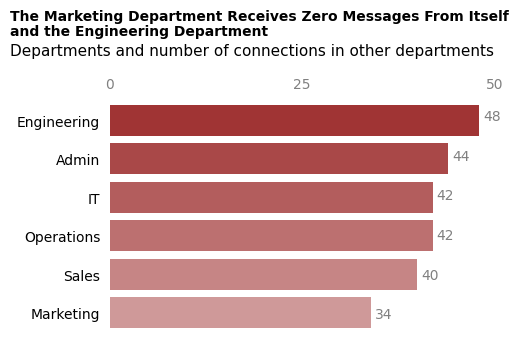

In [131]:
# bar chart showing the most influential departments
fig, ax = plt.subplots(figsize=[5,3])
ax = sns.barplot(data= df_influence,x='outside_connections',y='department',color='#B22222')
for loc in ['right','left','top','bottom']:
    ax.spines[loc].set_visible(False)
for bar, alpha in zip(ax.containers[0],np.linspace(1,0.5,6)):
    bar.set_alpha(alpha)
ax.set_xlabel('');
ax.set_ylabel('');
ax.xaxis.tick_top()
ax.tick_params(left=False,top=False)
ax.tick_params(axis='x',colors='grey')
ax.set_xticks([0,25,50]);
ax.text(-13,-1.7,'Departments and number of connections in other departments',size=11);
ax.text(-13,-2.6,'The Marketing Department Receives Zero Messages From Itself',size=10,weight='bold');
ax.text(-13,-2.2,'and the Engineering Department',size=10,weight='bold');
y = 0
for x in df_influence.outside_connections:
    ax.text(x+0.5,y,'{}'.format(x),color='grey');
    y += 1.03

#### Report
A bar chart showing the most influential departments based on the number of unique employees from other departments who contacted them. 
- The _Engineering_ department is the most influential department. This is interesting because the _Engineering_ department has one of the poorest collaboration with other departments. This may be due to the importance of the department to other departments since they are involved in the maintenance of equipments and facilities required for the smooth running of the company.
- The _Marketing_ department again is the least influential department.
- The _Admin_ department is also very influential as expected because they are responsible for the administrative duties of the company hence commanding a lot of respect and influence.

In [132]:
# pivot table showing the number of connections shared among departments
dept_collab = pd.pivot_table(master,values='receiver',index='sender_dept',columns='receiver_dept',aggfunc=np.size).sort_values('Admin',ascending=False)
dept_collab

receiver_dept,Admin,Engineering,IT,Marketing,Operations,Sales
sender_dept,,,,,,
Sales,364.0,114.0,116.0,78.0,340.0,539.0
Operations,245.0,91.0,76.0,40.0,198.0,363.0
Admin,172.0,33.0,48.0,19.0,287.0,298.0
IT,8.0,6.0,6.0,3.0,10.0,16.0
Engineering,4.0,6.0,3.0,NaN,8.0,5.0
Marketing,4.0,2.0,NaN,NaN,2.0,8.0


#### Report
A pivot table was created using the departments of the senders as the index and departments of the receivers as the columns. The values are the number of connections shared among those departments. This gives insight into the amount of collaboration between these departments and which department is driving the collaboration.

- The _Engineering_ department is not initiating any collaboration with the _Marketing_ department
- The Marketing department is not initiating any collaboration with the _IT_ department and even itself.
- There is generally poor collaboration in the _Marketing, Engineering and IT_ departments.


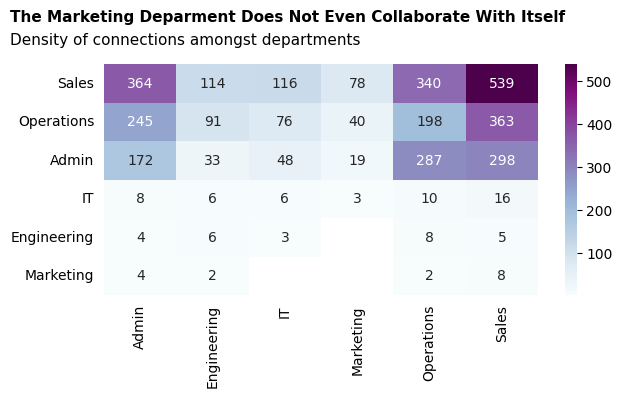

In [133]:
# create a heatmap showing the collaboration between all departments
fig, ax = plt.subplots(figsize=[7,3])
ax = sns.heatmap(data=dept_collab,cmap='BuPu',annot=True,fmt='g')
ax.tick_params(left=False,bottom=False)
ax.set_xlabel("");
ax.set_ylabel("");
ax.text(-1.3,-1.1,'The Marketing Deparment Does Not Even Collaborate With Itself',size=11,weight='bold');
ax.text(-1.3,-0.5,'Density of connections amongst departments',size=11);

#### Report
A heatmap showing the the number of connections between departments both as the sender and receiver. This lets us know which departments have the best collaboration amongst themselves and which department is in the driving seat of that collaboration. The sending department is on the y axis while the receiving department is on the x axis.
- The best _intra-departmental_ collaboration is within the _Sales_ department.
- The best _inter-departmental_ collboration is between the _Sales_ and _Admin_ departments with the _Sales_ department driving the collaboration.
- The worst _intra-departmental_ collaboration is within the _Marketing_ department.
- The worst _inter-departmental_ collaboration is between the _Marketing_ and _Engineering_ departments, and the _Marketing_ and _Operations_ departments, with the _Marketing_ department being the culprit.
- There is good collaboration amongst the _Sales, Operations and _Admin_ departments.
- There is poor collaboration amongst the _Marketing, Engineering and IT_ departments and these departments do not collaborate well with the departments that have shown to have good collaboration.

In [134]:
# create a dataframe classifying department collaboration as good or bad.
collab = master[['message_length','sender_dept']]
# define a function that categorizes the department
def category(x):
    if x in ['Sales','Operations','Admin']:
        return 'Good'
    else:
        return 'Bad'
# apply the function to the sender_department category
collab['collaboration'] = collab.sender_dept.apply(category)
collab.groupby('collaboration').agg([np.mean,np.median,np.min,np.max]).message_length

,mean,median,amin,amax
collaboration,,,,
Bad,46.032967,47.0,10,85
Good,48.515054,49.0,10,88


#### Report
A table showing the classification of collaboration of a particular department has either _good_ or _bad_, and some descriptive statistics of the message length for each category. This category is baded on initial analysis of the departments and insights found.
- _Sales, Admin, and Operations_ departments were shown to have good collaboration attitude.
- _Marketing, Engineering, and IT_ departments were shown to have bad collaboration attitude.
This would help to show the distribution of length of messages sent by departments who have good, and bad collaboration attitude.
- Both the mean and median message length sent is higher for departments categorized to have good collaboration.
- The maximum message length was also sent by a department with good collaboration attitude
- The minimum message length is the same for both categories

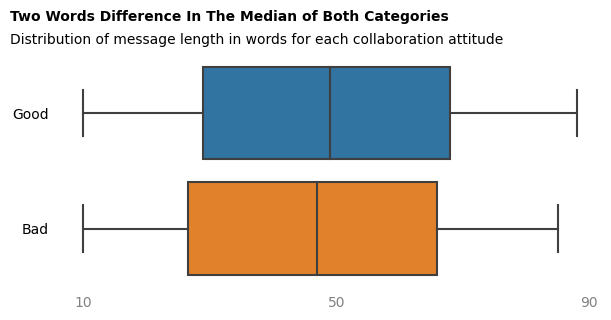

In [135]:
# create a box plot showing the distribution of message length sent by departments who have good or bad collaboration attitudes.
fig, ax = plt.subplots(figsize=[7,3])
ax = sns.boxplot(data=collab,x='message_length',y='collaboration')
for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.tick_params(bottom=False,left=False)
ax.set_xticks([10,50,90]);
ax.tick_params(axis='x',colors='grey')
ax.set_xlabel("");
ax.set_ylabel('');
ax.text(-1.6,-0.6,'Distribution of message length in words for each collaboration attitude');
ax.text(-1.6,-0.8,'Two Words Difference In The Median of Both Categories',weight='bold');

#### Report
Box plot showing the distribution of message length in words for departments with either good or bad collaboration attitude.
- The 75th percentile for departments with good collaboration attitude is higher than that of departments with bad collaboration attitude.
- The Median for good departments is higher than for bad departments in terms of collaboration attitude.
- The 25th percentile for departments with good collaboration attitude is higher than that of departments with bad collaboration attitude.
- The maximum message length is also higher for departments with good collaboration attitude.
- Departments with good collaboration attitude tend to communicate more than departments with bad collaboration attitude.

### 4. Using the network analysis, in which department would you recommend the HR team focus to boost collaboration?

#### Recommendations
- The HR team needs to develop strategies that would ensure more team work and collaboration betweeen _Marketing, Engineering, and IT departments_. 
- Although the Engineering department is quite influential, the HR team needs to set up tasks that would make the _Engineering_ department work more with other departments.
- Inter departmental hangouts can also boost the relationships between different departments and also increase inter-departmental connections.
- Possible rotation of employees through every department for some period of time can also help employees appreciate other departments more and improve collaboration.